## Linear Regression Part2: Getting and Evaluating Data

This is part 2 of the posts on Linear Regression. [Part 1 gave an introduction, motivation](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-1-954/) and defined many of the terms that will be used. You might want to give that a read before looking at this.

You are free to use this post as you see fit. It was converted to html from a Jupyter notebook. The notebook is available at [https://github.com/dbkinghorn/blog-jupyter-notebooks](https://github.com/dbkinghorn/blog-jupyter-notebooks)

The focus in this post is on getting our data and taking a first look at it. We will use some of the of the standard (nice!) tools available as Python modules to do this.

Since this is supposed to be an introduction I will be fairly verbose in descriptions of what is being done. Most of the dialog will be in "markdown" cells like what you are reading now. I will use Python comments in code cells for short descriptions.

## Get the data
### King County WA Housing sales data for 2014-15
I got the data I'm using from [Kaggle](https://www.kaggle.com/). Kaggle is an interesting data analysis community site and worth a visit if you haven't seen it. The data set is on the page ["House Sales in King County, USA"](https://www.kaggle.com/harlfoxem/housesalesprediction). The data is in a .zip file and will expand to a .csv file (comma separated values). Grab that, unzip it and put it in your working directory.  


## Evaluate the data for usability
Now the real work starts. We have some data so the first thing we need to do see if it is usable. **Our goal is simple: Find some "interesting" data to use for an example of linear regression.** We are guessing that housing sale prices data will correlate well with the size of a house. However, 
> **... the first rule of data analysis is don't assume anything! Look at the data and make sure it usable. Remember, garbage in garbage out!** 

Lets take a look at this data set and see if we can use it.

The fist thing we need to do is load some Python tools. The following module loads will become a pretty standard start to this kind of work. We are importing modules and using the common abrivations for their namespaces. [`pandas`, `numpy`, `matplotlib`, and `seaborn` are common tools for this work. I hope to write separate usage posts on these at some point ]
- [**pandas**](http://pandas.pydata.org/) -- is a VERY useful data handling package for Python (it is one of the reasons that Python has become so popular for data analysis!
- [**numpy**](http://www.numpy.org/) -- is a standard Python module for numerical calculations with nice array (vector and matrix) handling.
- [**matplotlib**](https://matplotlib.org/) -- is a popular plotting library often used as a backend for other packages.
- [**seaborn**](https://seaborn.pydata.org/) -- is very nice plotting and data handling package that uses matplotlib (easier to use)

- `%matplotlib inline` -- is what is know as a Jupyter notebook **magic** it is a just telling the notebook to put the plots in-line in the notebook.

- `pd.set_option('...')` -- lines are just something I added to make the output formatting look better in some of the output cells.


In [1]:
import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

After you have "un-zipped" the data file you have a file named kc_house_data.csv" We will load that into a pandas data frame and take a look at the first few lines of data. [ We will call the data-frame **df** for now, which is common practice.]

In [2]:
df = pd.read_csv("kc_house_data.csv")  # create a dataframe with pandas "pd"

In [3]:
df.head()  # display the first few lines of the dataframe "df"

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


The data looks very clean. We wont have to do any type or format conversions. Lets make a quick check for missing values. [ looks OK ]

In [4]:
df.isnull().values.any()  # check for missing values

False

Here is some basic stats for some of the data.

In [5]:
df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","yr_built","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1788.39,1971.01,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,828.09,29.37,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,290.00,1900.00,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1190.00,1951.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1560.00,1975.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2210.00,1997.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,9410.00,2015.00,6210.00,871200.00


You can see the home prices vary from \$75K to \$7.7million with living space from 290sqft to 13540sqft. Lots of variety!

The data set contains 21613 observations (home sales in 2014-15) with 19 features plus house price. Descriptions and names of the columns (features) are given below.

-    id
-    date: Date house was sold
-    price: Price of the sold house
-    bedrooms: Number of Bedrooms
-    bathrooms: Number of bathrooms
-    sqft_living: Square footage of the living space
-    sqrt_lot: Square footage of the lot
-    floors: Total floors in the house
-    waterfront: Whether the house is on a waterfront(1: yes, 0: no)
-    view: special view?
-    condition: Condition of the house
-    grade: unknown
-    sqft_above: Square footage of house apart from basement
-    sqft_basement: Square footage of the basement
-    yr_built: Built year
-    yr_renovated: Year when the house was renovated
-    zipcode: zipcode of the house
-    lat: Latitude coordinate
-    long Longitude coordinate
-    sqft_living15: Living room area in 2015(implies some renovations)
-    sqrt_lot15: Lot area in 2015(implies some renovations)

Since we are doing linear regression we'll want to look at "continuous" features. Intuitively that will be sqft_living but could possibly be 'sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'. Lets take a look at these with some  plots using seaborn.

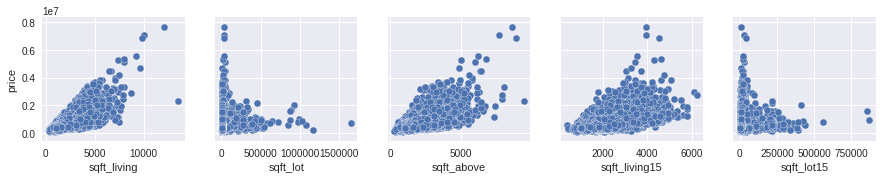

In [6]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

You can see that "lot" size is not well correlated to price but the data for living space is reasonable. Visually the best feature to use looks like sqft_living as we expected.

Lets pull that data out of the data-frame into a new frame.

In [7]:
df2 = df[["price", "sqft_living"]]
df2.head()

,price,sqft_living
0,221900.00,1180
1,538000.00,2570
2,180000.00,770
3,604000.00,1960
4,510000.00,1680


Now take a a closer look at the data with a joint distribution plot.

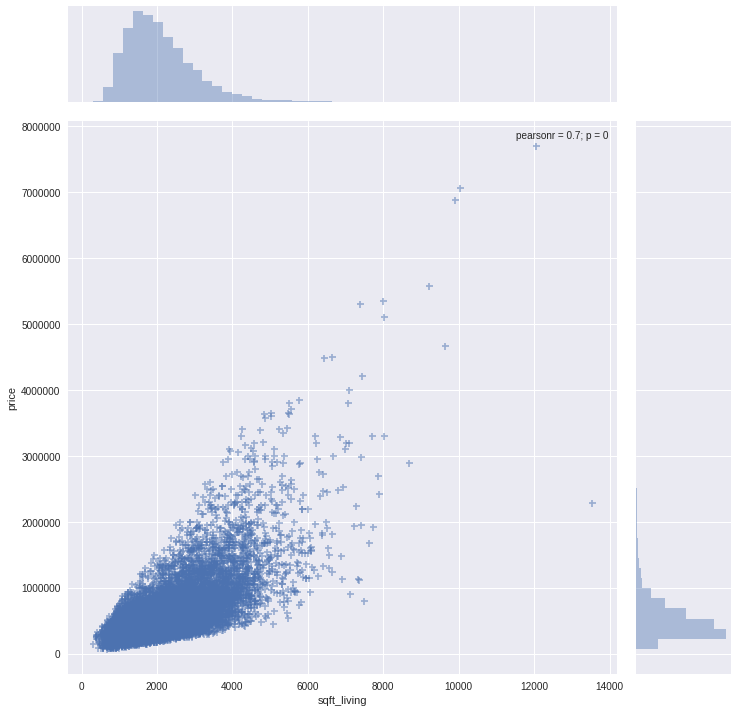

In [8]:
sns.jointplot('sqft_living','price', data=df2, size=10, alpha=.5, marker='+')

The increase of price with sqft_living space is pretty clear and the "Pearson r value" is .7 indicating a reasonable correlation.  However, the data distributions show a big concentration of values in the lower left of the plot. That makes sense, most houses are between 1200 and 3000 sqft and a few hundred thousand dollars. We can eliminate the very expensive and very large houses and take another look at the data.

If we set the size (xlim) from 500 to 3500sqft and the price (ylim) from 100,000 to \$1,000,000 the data still shows the trend but it looks very scattered.    

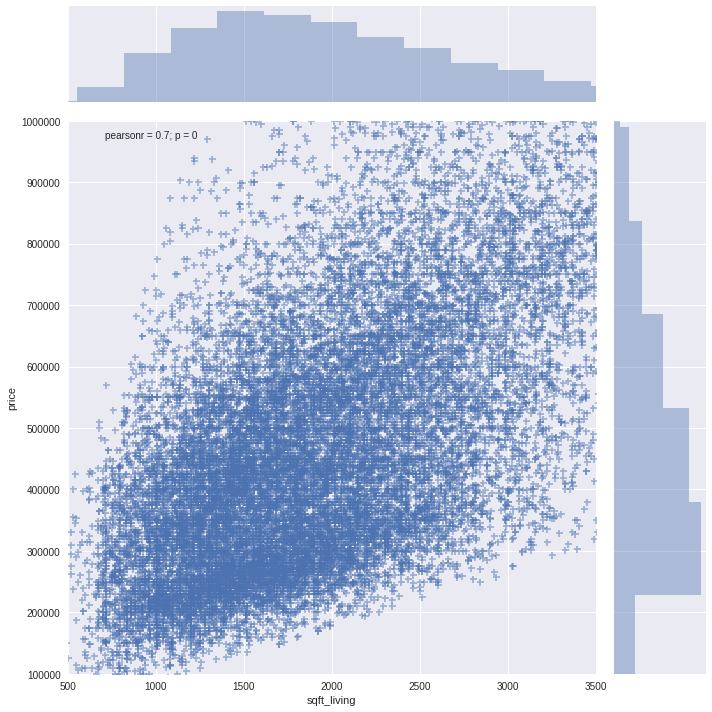

In [9]:
sns.jointplot('sqft_living','price', data=df2, xlim=(500,3500), ylim=(100000,1000000), size=10, alpha=.5, marker='+')

Something worth considering is that different neighborhoods can vary greatly in average house price. Some nice neighborhoods are very expensive and some other (also nice!) neighborhoods can be quite affordable. It might be good to look at average house price by zipcode since we have that in our dataset.

In [10]:
df["zipcode"].nunique()

70

It looks like there are 70 different sip codes in King county. Lets see how many house sales there were in each.

In [11]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    274
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, dtype: int64

How about the average house sale price in each zipcode ...

In [12]:
df.groupby('zipcode')['price'].mean()  # group by zipcode and compute the mean of prices in a zipcode

zipcode
98001    280804.69
98002    234284.04
98003    294111.28
98004   1355927.08
98005    810164.88
98006    859684.78
98007    617105.09
98008    645507.38
98010    423665.99
98011    490351.47
98014    455617.11
98019    424788.75
98022    315709.30
98023    286732.79
98024    580526.79
98027    616990.59
98028    462480.04
98029    612653.61
98030    296187.98
98031    300539.89
98032    251296.24
98033    803719.52
98034    521652.86
98038    366867.60
98039   2160606.60
98040   1194230.02
98042    311632.11
98045    439471.08
98052    645231.46
98053    678163.06
98055    304262.11
98056    420890.55
98058    353608.64
98059    493552.53
98065    527961.20
98070    487479.63
98072    569958.47
98074    685605.78
98075    790576.65
98077    682774.88
98092    334921.06
98102    901258.27
98103    584919.21
98105    862825.23
98106    319581.39
98107    579053.42
98108    355678.52
98109    879623.62
98112   1095499.34
98115    619900.55
98116    618634.17
98117    576795.01
9811

The two zipcodes that look the most interesting to me are 98103 and 98039. 98103 has the most house sale values, 602, with an average sale price of \$584,919.  The most expensive zipcode 98039 has 50 sale values with an average sale price of \$2,160,606. 

We can create "selectors" by creating lists of true-false values for data entries that match these two zipcodes and then use those to filter our data-frame.

In [13]:
zip98103 = df['zipcode'] == 98103  # True if zip is 98103
zip98039 = df['zipcode'] == 98039

Using the "selectors" above we can look at plots of price vs sqft_living in those zipcodes.

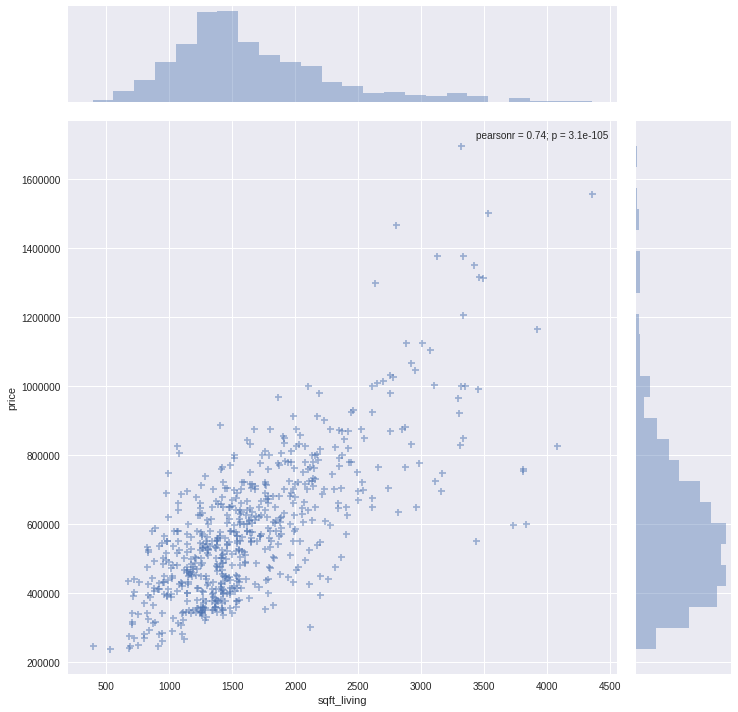

In [14]:
sns.jointplot('sqft_living','price', data=df2[zip98103], size=10, alpha=.5, marker='+')

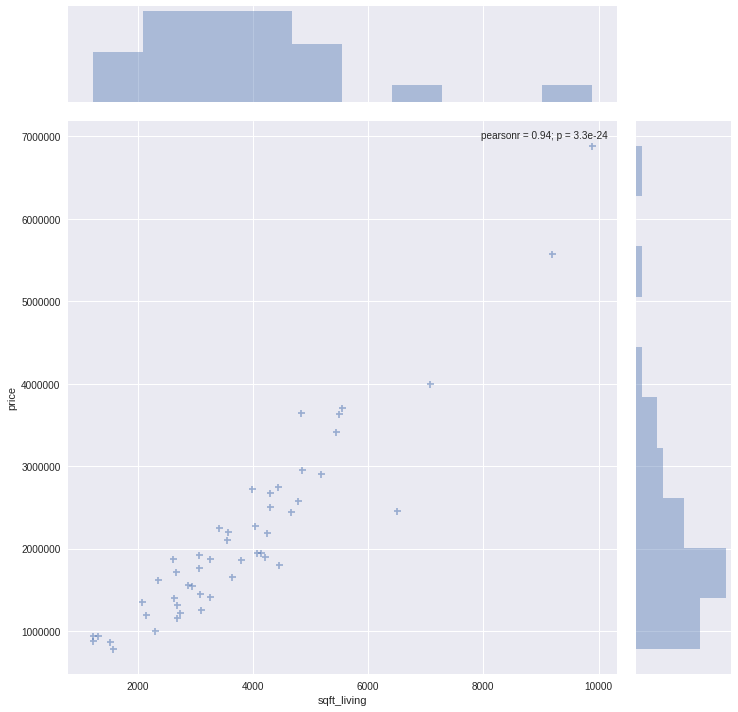

In [15]:
sns.jointplot('sqft_living','price', data=df2[zip98039], size=10, alpha=.5, marker='+')

The 98103 zipcode has a distribution that looks similar to the complete dataset. It's interesting that in the most expensive zipcode, 98039, the house sale prices seems to be highly correlated to the size of the house (house-size envy :-)  Note: I don't live in that expensive zipcode! (my neighborhood is about 10 times less expensive than that and I like it a lot)

I did actually look at all of the zipcodes and in general localizing to zipcode does improve the correlation of size to price and is probably more meaningful and useful to model just specific zipcodes. We want our model to have good predictive value so restricting to smaller areas with less variation in price is a good thing.

I'll use the expensive zipcode data for the Linear Regression example we are working on. You could grab these notebooks and use any data subset you like!

Here's the data-frame we'll use,

In [16]:
df_98039 = df2[zip98039]

In [17]:
df_98039.describe()

,price,sqft_living
count,50.00,50.00
mean,2160606.60,3800.90
std,1166477.34,1764.50
min,787500.00,1220.00
25%,1401000.00,2680.00
50%,1892500.00,3560.00
75%,2556250.00,4452.50
max,6885000.00,9890.00


That's enough! You can spend hours playing with a dataset. These Python tools are wonderful for exploration. I'm new to using these modules and I am really impressed with what can be done. If I had wanted to I could have done the linear regression along with the data plots. However, that would defeat the purpose of these blog posts. I encourage you to try some of this yourself. 

In the nest post I'll get back to the Linear Regression algorithms and take a deep look at how they work.

**Happy computing! --dbk**